### This notebook convertes  "Who left?" Figure (figure-2) R script code to python. 

Author: Mariela Rosa Casillas & Camila Vazquez Rodriguez 

## We Installed 

In [1]:
! pip3 install pandas 
! pip3 install pyreadr 
! pip3 install numpy 
! pip3 install matplotlib
! pip3 install plotnine 


### Pyreadr to load R data files with dataframes 
### Pandas to handle dataframes 
### Numpy for math operations
### Matplotlib to plot 
### And plotnine, because it hass ggplot, to plot 

# Imports 

### R

### Python

In [2]:
import pandas as pd
import pyreadr
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar

# Load Data 

### R

### Python 

In [3]:
# Load R files 
load_data = pyreadr.read_r('../data/rdata/ACS2016.Rdata')
individuals = pyreadr.read_r("../data/rdata/ind_hh.RDS")
where_df = pyreadr.read_r("../data/rdata/where_df.RDS")
hh_main = pyreadr.read_r("../data/rdata/hh_main.RDS")

# Convert to Pandas Dataframe
individuals_df=individuals[None]
where_df = where_df[None]
hh_main = hh_main[None]


#### Lets see the data

In [4]:
individuals_df.head()

,hh_id,username,completed_time,hh_id__1,gender,age,lived_movedin,movedin_month,movedin_bc_hurricane,status,missing_month,left_month,left_b_p_hurricane,left_bc_hurricane,left_first,left_final,hh_mem_num,strata,left_final_cat
0,10,hrosa,2018-01-18 17:22:47,0.0,1,71.0,1,---,---,1,---,---,---,---,---,---,1,1.0,NA
1,10,hrosa,2018-01-18 17:22:47,1.0,0,50.0,1,---,---,1,---,---,---,---,---,---,2,1.0,NA
2,10,hrosa,2018-01-18 17:22:47,2.0,1,31.0,1,---,---,1,---,---,---,---,---,---,3,1.0,NA
3,100,pcott,2018-01-22 20:37:58,0.0,0,68.0,1,---,---,1,---,---,---,---,---,---,1,5.0,NA
4,100,pcott,2018-01-22 20:37:58,1.0,1,37.0,1,---,---,1,---,---,---,---,---,---,2,5.0,NA


In [5]:
where_df.head()

,strata,left_final,left_final_cat,count,prop,rev_left_cat
0,1.0,1,Somewhere\nelse in PR,27,0.028125,Somewhere\nelse in PR
1,1.0,2,Florida,6,0.006250,Florida
2,1.0,3,New York,3,0.003125,New York
3,1.0,4,Texas,4,0.004167,Texas
4,1.0,5,Another\nState,12,0.012500,Another\nState


In [6]:
hh_main.head()

,hh_id,id,house_status,consent,hh_size,access_med.no_911,access_med.no_transport,access_med.roads_damaged,access_med.facility_closed,access_med.no_doctors,...,cell.sept,cell.oct,cell.nov,cell.dec,mort_neighbor,left_neighbor,neighbors_num,strata,flag,mun_id
0,10,575,---,1,3.0,99,99,99,99,99,...,2,4,4,0,99,---,3,1.0,0.0,3.0
1,100,630,---,1,3.0,99,99,99,99,99,...,2,4,2,0,99,---,3,5.0,0.0,15.0
2,1000,717,1,1,3.0,99,99,99,99,99,...,3,4,4,3,99,6,2,2.0,1.0,22.0
3,1001,856,1,1,2.0,99,99,99,99,99,...,2,4,4,3,0,0,4,6.0,1.0,11.0
4,1002,475,1,1,3.0,99,99,99,1,3,...,2,2,0,0,0,3,3,4.0,1.0,21.0


 # Working with the data

### R 

### Python

 #### Merge individuals with HH strata

In [7]:
ind_hh = individuals_df.merge(hh_main, on=['hh_id', 'strata'], how='left')

In [8]:
factors = {'0': "Don't Know",
 '1': 'Somewhere else in PR',
 '2': 'Florida',
 '3': 'New York',
 '4': 'Texas',
 '5': 'Another State',
 '6': 'Another Country',
 '7': "Don't Know",
 '---': None}
ind_hh = ind_hh.assign(left_final = ind_hh['left_final'].map(lambda x: factors[x]))

In [9]:
#ind_hh['left_final'].unique()

In [10]:
temp = ind_hh.assign(left = ind_hh['left_final'].map(lambda x: 0 if x != None else 1))

In [11]:
temp['age_cat'] = pd.cut(temp.age, list(range(0,85,10)) + [np.infty], include_lowest = True, right = False)

#### We coulnt find the equivelent of all the transformations done in the data so we decided to group by age_cat and left_final car 

In [12]:
left_df = temp.groupby(["age_cat", "left_final_cat"])

In [13]:
left_df = left_df.size().unstack()

In [14]:
left_df.columns

CategoricalIndex(['Another\nCountry', 'Another\nState', 'Don't Know',
                  'Florida', 'NA', 'New York', 'Somewhere\nelse in PR',
                  'Texas'],
                 categories=['Another\nCountry', 'Another\nState', 'Don't Know', 'Florida', 'NA', 'New York', 'Somewhere\nelse in PR', 'Texas'], ordered=False, name='left_final_cat', dtype='category')

# Plotting

### R 

### Python

#### We did a simple plot with matplotlib

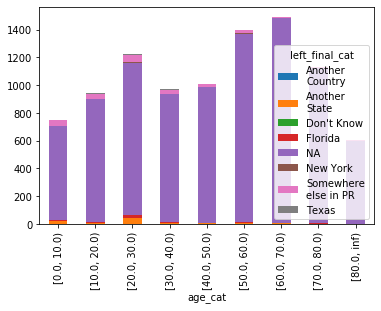

In [15]:
left_df.plot(kind='bar',stacked=True)

#### Now using ggplot

In [16]:
from plotnine import *
import pandas as pd


In [17]:
left_df.columns=left_df.columns.astype('str')
left_df.reset_index()

left_final_cat,age_cat,Another\nCountry,Another\nState,Don't Know,Florida,NA,New York,Somewhere\nelse in PR,Texas
0,"[0.0, 10.0)",NaN,21.0,NaN,6.0,677.0,5.0,38.0,3.0
1,"[10.0, 20.0)",NaN,7.0,1.0,5.0,890.0,NaN,35.0,2.0
2,"[20.0, 30.0)",2.0,42.0,1.0,18.0,1097.0,4.0,56.0,7.0
3,"[30.0, 40.0)",NaN,9.0,NaN,6.0,918.0,2.0,33.0,1.0
4,"[40.0, 50.0)",NaN,7.0,NaN,2.0,976.0,NaN,24.0,NaN
5,"[50.0, 60.0)",NaN,8.0,NaN,4.0,1359.0,1.0,28.0,NaN
6,"[60.0, 70.0)",NaN,5.0,NaN,3.0,1478.0,NaN,5.0,NaN
7,"[70.0, 80.0)",NaN,2.0,1.0,2.0,1115.0,NaN,9.0,NaN
8,"[80.0, inf)",NaN,1.0,1.0,NaN,594.0,NaN,11.0,NaN


In [18]:
left_df = temp.groupby(["age_cat", "left_final_cat"])

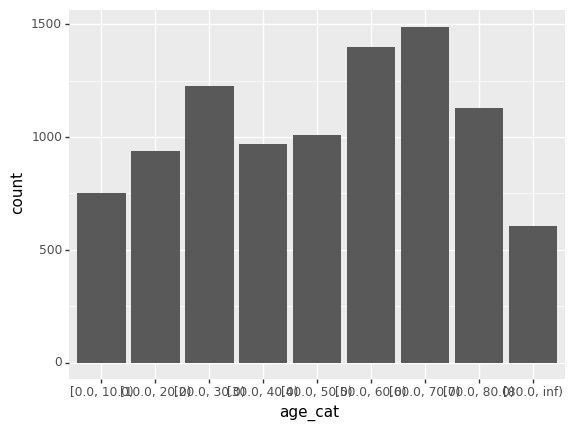

<ggplot: (310236613)>

In [19]:
ggplot(temp) + geom_bar(aes(x='age_cat'))


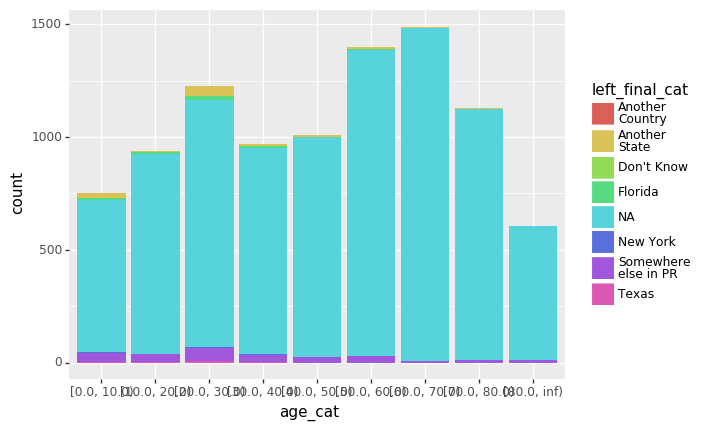

<ggplot: (310588285)>

In [20]:
ggplot(temp, aes(x="age_cat", fill="left_final_cat")) + geom_bar()

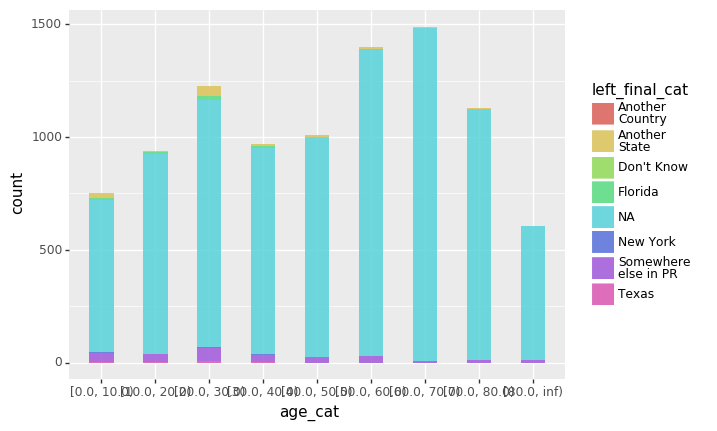

<ggplot: (310597541)>

In [21]:
ggplot(temp, aes(x="age_cat", fill="left_final_cat")) + geom_bar( alpha = .85, width = .45)

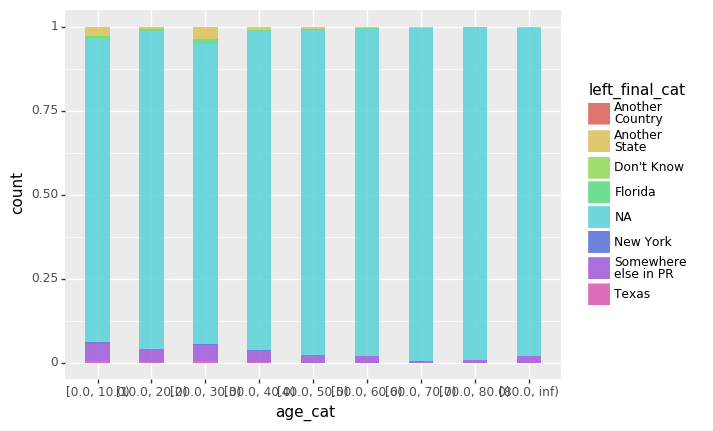

<ggplot: (310592941)>

In [22]:
ggplot(temp, aes(x="age_cat", fill="left_final_cat")) + geom_bar(position='fill', alpha = .85, width = .45)